## Mean vs Gaussian Filtering

In this notebook, we compare the performance of the **Mean filter** and the **Gaussian filter** for image smoothing.

Both filters are implemented using OpenCV.  
We evaluate their behavior using:
- Visual comparison
- Mean Squared Error (MSE) analysis

#### Imports

In [4]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

### Import images

In [5]:


# Load custom noisy images (full paths)
image1_bgr = cv2.imread("Mean_Filter_Implementation\noisy_1.jpg")
image2_bgr = cv2.imread("Mean_Filter_Implementation\noisy_2.jpg")

# BGR to RGB for Matplotlib
image1_rgb = cv2.cvtColor(image1_bgr, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2_bgr, cv2.COLOR_BGR2RGB)

print(f"Image 1 shape (RGB): {image1_rgb.shape}, dtype: {image1_rgb.dtype}")
print(f"Image 2 shape (RGB): {image2_rgb.shape}, dtype: {image2_rgb.dtype}")

# Grayscale version
img_path = Path("Mean_Filter_Implementation\noisy_2.jpg")
if img_path.exists():
    img_in = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
else:
    print("No image found. Using synthetic image.")
    img_in = np.tile(np.linspace(0, 255, 256, dtype=np.uint8), (256, 1))

# Gaussian noise for demonstration
mean, std = 0, 50
gauss_noise = np.random.normal(mean, std, img_in.shape).astype(np.int16)
noisy_img = img_in.astype(np.int16) + gauss_noise
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

print(f"Noisy image shape: {noisy_img.shape}, dtype: {noisy_img.dtype}")




Image 1 shape (RGB): (148, 148, 3), dtype: uint8
Image 2 shape (RGB): (133, 197, 3), dtype: uint8
Noisy image shape: (133, 197), dtype: uint8


#### Gaussian filter

In [6]:

# Small and large Gaussian kernels
gauss_small = cv2.GaussianBlur(noisy_img, (5, 5), 1.0)
gauss_large = cv2.GaussianBlur(noisy_img, (11, 11), 3.0)


#### Mean filter

In [7]:

# Mean filter with same kernel sizes
mean_small = cv2.blur(noisy_img, (5, 5))
mean_large = cv2.blur(noisy_img, (11, 11))

#### Visualization and Analysis


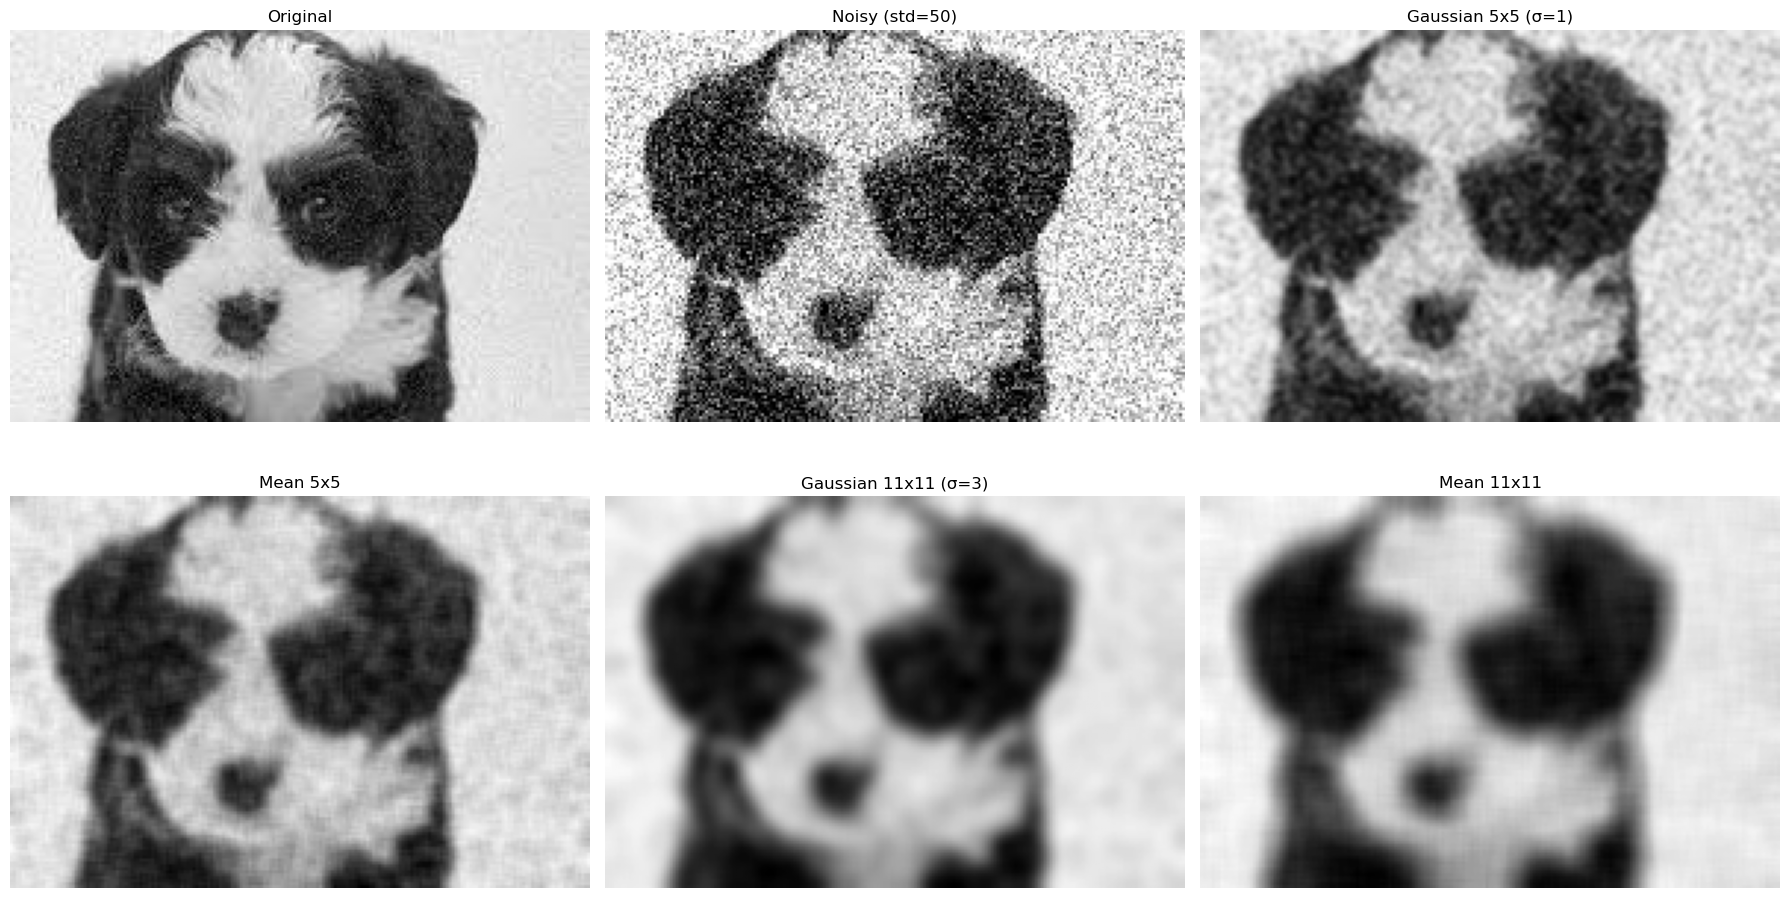

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes[0,0].imshow(img_in, cmap='gray')
axes[0,0].set_title('Original')
axes[0,0].axis('off')

axes[0,1].imshow(noisy_img, cmap='gray')
axes[0,1].set_title('Noisy (std=50)')
axes[0,1].axis('off')

axes[0,2].imshow(gauss_small, cmap='gray')
axes[0,2].set_title('Gaussian 5x5 (σ=1)')
axes[0,2].axis('off')

axes[1,0].imshow(mean_small, cmap='gray')
axes[1,0].set_title('Mean 5x5')
axes[1,0].axis('off')

axes[1,1].imshow(gauss_large, cmap='gray')
axes[1,1].set_title('Gaussian 11x11 (σ=3)')
axes[1,1].axis('off')

axes[1,2].imshow(mean_large, cmap='gray')
axes[1,2].set_title('Mean 11x11')
axes[1,2].axis('off')

plt.tight_layout()
plt.show()


### Observations

- Both filters reduce noise effectively.
- The Gaussian filter preserves edges better than the Mean filter.
- Larger kernel sizes increase smoothing but reduce image detail.
- Gaussian filtering generally results in lower MSE compared to Mean filtering.
